Hypothesis: Participants working in healthcare will have lower mental health scores on the Flourishing Scale than those working in other industries.

In [314]:
import pandas as pd
import numpy as np

people_df = pd.read_excel('Demographic Data.xlsx')

In [315]:
people_df

,Mobile ID,State,Age,Industry
0,82420964,AZ,33,Finance
1,56954906,NC,46,Healthcare
2,27361835,WA,33,Insurance Sales
3,63406467,MD,27,Technology
4,70975009,AZ,40,Veterans Affairs
...,...,...,...,...
64,51755925,WY,54,IT
65,68454890,NY,45,Education
66,96243591,NY,36,Technology
67,58395682,CA,37,Education


In [316]:
dataset = pd.read_excel('7105000 (1).xlsx')
dataset = dataset.iloc[:][['mbl_cod', 'MENTAL_HEALTH']]
dataset = dataset.groupby(['mbl_cod'], as_index=False).mean()

In [317]:
dataset = pd.merge(dataset,
                     people_df[['Mobile ID', 'Industry']], 
                     left_on='mbl_cod',
                     right_on='Mobile ID',
                     how='left'
                    )
dataset = dataset.dropna()
dataset.head(60)

,mbl_cod,MENTAL_HEALTH,Mobile ID,Industry
0,11822993,7.400000,11822993.0,Healthcare
1,17180706,8.500000,17180706.0,Technology
2,17309235,6.333333,17309235.0,Aerospace and defense
3,20126808,8.000000,20126808.0,Pharmacy Operations
4,20763027,9.200000,20763027.0,Interior Design
5,22141157,9.625000,22141157.0,Healthcare
6,22541511,9.615385,22541511.0,Veterans Affairs
7,23916703,8.909091,23916703.0,Healthcare
8,25230030,9.555556,25230030.0,Insurance
9,26141560,5.000000,26141560.0,Technology


In [318]:
dataset = dataset.drop(columns=['Mobile ID', 'mbl_cod'])
dataset.groupby('Industry', as_index=False).mean()

,Industry,MENTAL_HEALTH
0,Aerospace and defense,6.333333
1,Book publishing,6.500000
2,Computer Software,7.333333
3,Data entry,5.500000
4,Education,7.208333
5,Energy,10.500000
6,Federal Human Resources,8.538462
7,Federal government,8.166667
8,Finance,8.000000
9,Healthcare,8.147410


We can observe that there are some typing difference. ex: 'Non profit' and 'Nonprofit'. Let's combine them together: 

In [319]:
dataset = dataset.replace('Veteran Affairs', 'Veterans Affairs')
dataset = dataset.replace('Nonprofit', 'Non profit')
dataset = dataset.replace('Federal Human Resources', 'Human Resources')
dataset = dataset.groupby('Industry', as_index=False).mean()
dataset['MENTAL_HEALTH'] -= 1 # minus 1 becuase the data is from 1 to 11. 
dataset

,Industry,MENTAL_HEALTH
0,Aerospace and defense,5.333333
1,Book publishing,5.500000
2,Computer Software,6.333333
3,Data entry,4.500000
4,Education,6.208333
5,Energy,9.500000
6,Federal government,7.166667
7,Finance,7.000000
8,Healthcare,7.147410
9,Human Factors,5.857143


[9.666666666666666, 9.5, 8.5, 8.2, 8.19055944055944, 8.071428571428571, 8.0, 7.846153846153847, 7.166666666666666, 7.147410439801744]


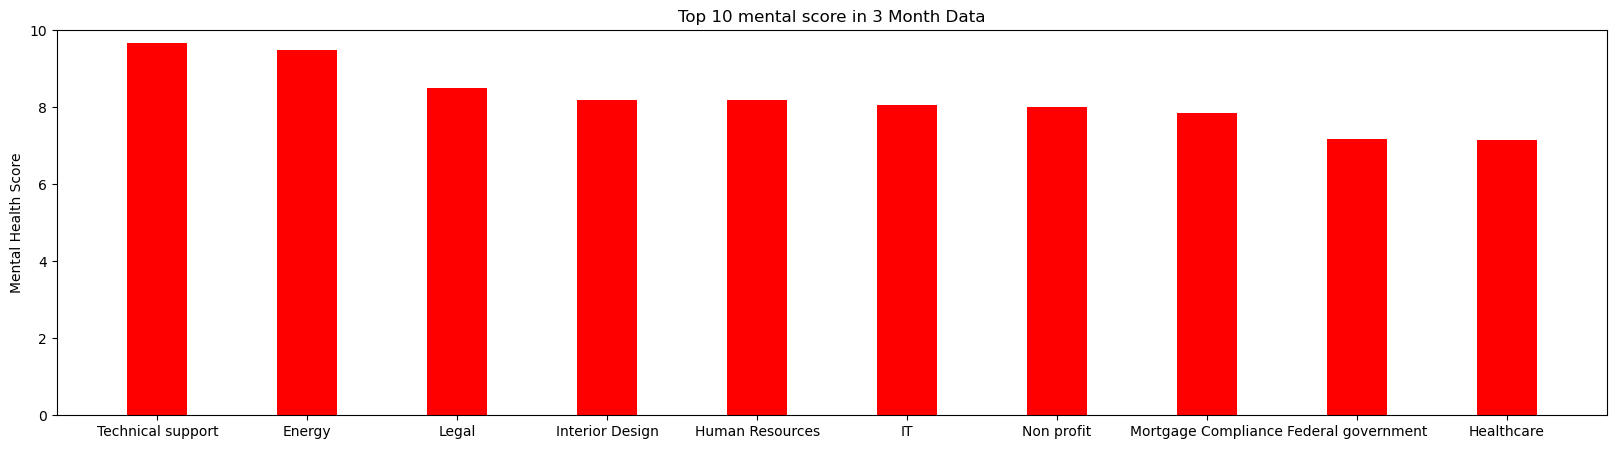

In [320]:
import matplotlib.pyplot as plt
dataset = dataset.sort_values(by=['MENTAL_HEALTH'], ascending=False)
industries = list(dataset.Industry.values[:10])
scores = list(dataset.MENTAL_HEALTH.values[:10])

print(scores)
fig = plt.figure(figsize = (20, 5))
plt.bar(industries, scores , color ='red', width = 0.4)
plt.ylim(0,10)
plt.ylabel("Mental Health Score")
plt.title("Top 10 mental score in 3 Month Data")
plt.show()

By observing the grapg above, the mental score of helthcare is the 10th high score in 26 unique industries. The result kind of violates the hypothesis since the score is still higher than half of industries. However, it is just for 3 month dataset. Let's try other datasets: 

In [321]:
dataset_2 = pd.read_excel('7105000 (2).xlsx')
dataset_2 = dataset_2.iloc[:][['mbl_cod', 'MENTAL_HEALTH']]
dataset_2 = dataset_2.groupby(['mbl_cod'], as_index=False).mean()

dataset_2 = pd.merge(dataset_2,
                     people_df[['Mobile ID', 'Industry']], 
                     left_on='mbl_cod',
                     right_on='Mobile ID',
                     how='left'
                    )
dataset_2 = dataset_2.dropna()
dataset_2 = dataset_2.drop(columns=['Mobile ID', 'mbl_cod'])

dataset_2 = dataset_2.replace('Veteran Affairs', 'Veterans Affairs')
dataset_2 = dataset_2.replace('Nonprofit', 'Non profit')
dataset_2 = dataset_2.replace('Federal Human Resources', 'Human Resources')
dataset_2 = dataset_2.groupby('Industry', as_index=False).mean()
dataset_2['MENTAL_HEALTH'] -= 1 # minus 1 becuase the data is from 1 to 11. 


[9.777777777777779, 9.72, 8.454545454545455, 8.363636363636363, 8.333333333333334, 8.2, 8.064144736842106, 8.0, 7.523809523809524, 7.213571016411237]


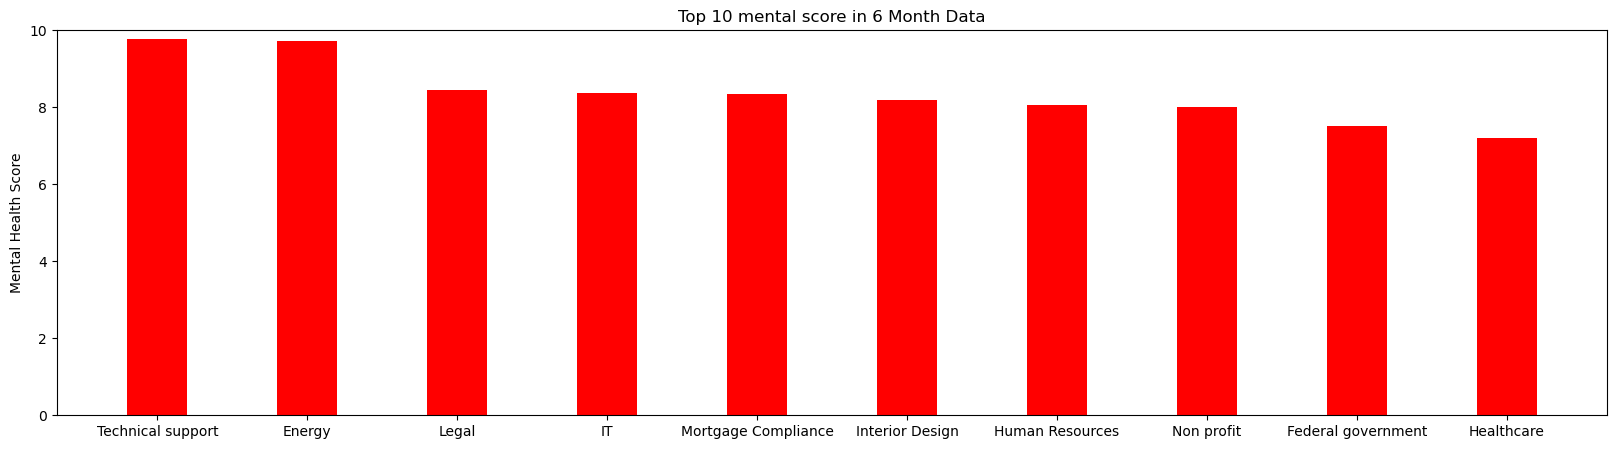

In [322]:
import matplotlib.pyplot as plt
dataset_2 = dataset_2.sort_values(by=['MENTAL_HEALTH'], ascending=False)
industries = list(dataset_2.Industry.values[:10])
scores = list(dataset_2.MENTAL_HEALTH.values[:10])

print(scores)
fig = plt.figure(figsize = (20, 5))
plt.bar(industries, scores , color ='red', width = 0.4)
plt.ylim(0,10)
plt.ylabel("Mental Health Score")
plt.title("Top 10 mental score in 6 Month Data")
plt.show()

The result is unsurprisingly similar. At this point, we can confirm that the hypothesis is invalid. However, we should find out which industries have the lowest mental scores: 

[6.6, 6.5, 6.333333333333333, 6.208333333333333, 6.166666666666667, 6.142857142857143, 5.857142857142857, 5.5, 5.333333333333333, 4.5]


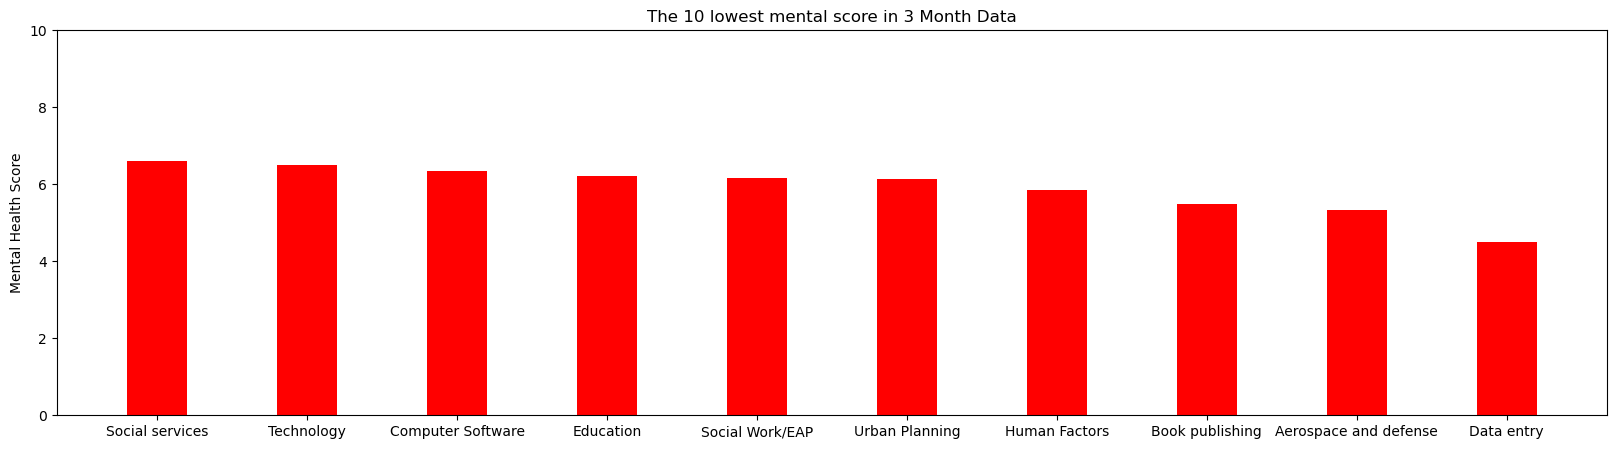

[6.785714285714286, 6.75, 6.526315789473684, 6.432481443994602, 6.428571428571429, 6.25, 5.857142857142857, 5.5, 5.333333333333333, 4.5]


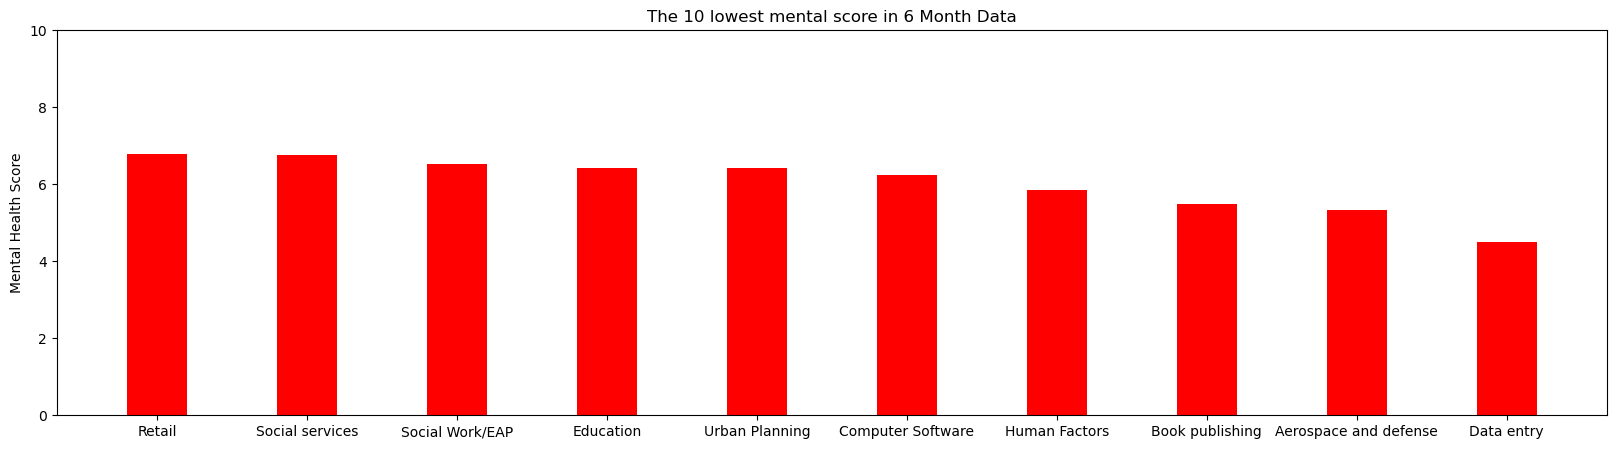

In [323]:
# 3 month
dataset = dataset.sort_values(by=['MENTAL_HEALTH'], ascending=False)
industries = list(dataset.Industry.values[-10:])
scores = list(dataset.MENTAL_HEALTH.values[-10:])

print(scores)
fig = plt.figure(figsize = (20, 5))
plt.bar(industries, scores , color ='red', width = 0.4)
plt.ylim(0,10)
plt.ylabel("Mental Health Score")
plt.title("The 10 lowest mental score in 3 Month Data")
plt.show()

# 6 month
dataset_2 = dataset_2.sort_values(by=['MENTAL_HEALTH'], ascending=False)
industries = list(dataset_2.Industry.values[-10:])
scores = list(dataset_2.MENTAL_HEALTH.values[-10:])

print(scores)
fig = plt.figure(figsize = (20, 5))
plt.bar(industries, scores , color ='red', width = 0.4)
plt.ylabel("Mental Health Score")
plt.ylim(0,10)
plt.title("The 10 lowest mental score in 6 Month Data")
plt.show()

We can see that the industries that have the lowest mental score are Data Entry, Aerospace and Defence, and Book Publishing.